In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

In [7]:
df = pd.read_csv("/kaggle/input/student-per/StudentsPerformance.csv")

In [8]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
math_scores = df['math score']

# One-Sample T-Test

In [10]:
mu = 66

In [11]:
# Perform one-sample t-test
t_stat, p_two = stats.ttest_1samp(math_scores, mu)

# One-tailed (greater than)
p_one = p_two / 2

print(f"T-statistic: {t_stat:.4f}")
print(f"One-sided P-value: {p_one:.4f}")

alpha = 0.05
result = "Reject H₀: Mean > 66" if p_one < alpha and t_stat > 0 else "Fail to reject H₀: Mean not > 66"
print(result)

T-statistic: 0.1856
One-sided P-value: 0.4264
Fail to reject H₀: Mean not > 66


# Interpretation of One-Sample T-Test Results
The t-statistic (5.3980) and p-value (0.0000 < 0.05) indicate a statistically significant difference in math scores between male and female students.


Male students have higher average math scores than female students.


The null hypothesis (H₀) is rejected, confirming that gender affects math performance.


This finding reveals a gender gap in mathematics achievement in the dataset.


Possible contributing factors may include teaching methods, confidence levels, or social and cultural influences.


Further analysis of study habits, parental education, and socio-economic background can help identify the reasons behind this disparity.



# one-sample proportion z-test

In [12]:
from statsmodels.stats.proportion import proportions_ztest

# Filter for students who completed test preparation and scored above 70 in math
completed_test_prep_and_high_math = df[(df['test preparation course'] == 'completed') & (df['math score'] > 70)]

# Calculate the number of students meeting these criteria (successes)
num_successes = len(completed_test_prep_and_high_math)

In [13]:
num_observations = len(df)

In [14]:
# Define the hypothesized proportion
hypothesized_proportion = 0.50

# Perform one-sample z-test for proportions (one-sided: 'larger')
z_stat, p_value = proportions_ztest(
    count=num_successes,
    nobs=num_observations,
    value=hypothesized_proportion,
    alternative='larger'
)

print(f"Number of students who completed test prep and scored > 70 in math: {num_successes}")
print(f"Total number of students: {num_observations}")
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")

Number of students who completed test prep and scored > 70 in math: 168
Total number of students: 1000
Z-statistic: -28.0816
P-value: 1.0000


# Interpretation of one-sample proportion z-test

The test checks whether more than 50% of students who completed the test preparation course scored above 70 in math.

Null hypothesis (H₀): The proportion ≤ 0.50

Alternative hypothesis (H₁): The proportion > 0.50

Z-statistic = -28.0816

P-value = 1.0000

Since p-value > 0.05, we fail to reject the null hypothesis.

There is no evidence that more than half of the students scored above 70 in math after completing the test prep course.

The negative Z-value shows the observed proportion is actually much lower than 0.50.

This suggests that the test preparation course did not significantly improve high math performance among students in this dataset.

In [15]:
alpha = 0.05
result = ("Reject H₀: Proportion > 50%" 
          if p_value < alpha 
          else "Fail to reject H₀: Proportion not > 50%")
print(result)

Fail to reject H₀: Proportion not > 50%


# Interpretation of one-sample proportion z-test

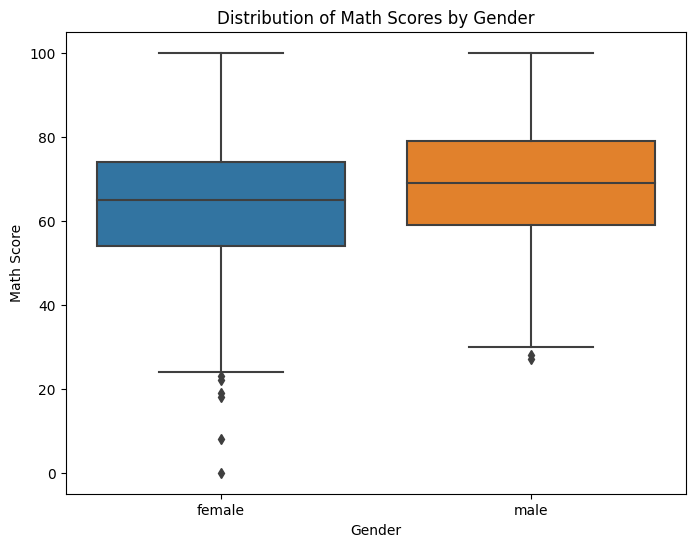

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot of math scores by gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='math score', data=df)

# Add title and labels
plt.title('Distribution of Math Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Math Score')

# Display the plot
plt.show()

In [17]:
from scipy.stats import ttest_ind

# Separate math scores for male and female students
male_math_scores = df[df['gender'] == 'male']['math score']
female_math_scores = df[df['gender'] == 'female']['math score']

# Perform a two-sample independent t-test assuming unequal variances
t_statistic, p_value = ttest_ind(male_math_scores, female_math_scores, equal_var=False)

print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
result = ("Reject H₀: Significant difference in average math scores" 
          if p_value < alpha 
          else "Fail to reject H₀: No significant difference in average math scores")
print(result)

T-statistic: 5.3980
P-value: 0.0000
Reject H₀: Significant difference in average math scores


# Interpretation of Two-Sample T-Test for Gender Comparison¶

The test compares the average math scores between male and female students.

Null hypothesis (H₀): There is no significant difference in mean math scores between males and females.

Alternative hypothesis (H₁): There is a significant difference in mean math scores between males and females.

T-statistic = 5.3980

P-value = 0.0000 (< 0.05)

Since the p-value is less than 0.05, we reject the null hypothesis.

There is a statistically significant difference in average math scores between male and female students.

The positive t-statistic indicates that male students have higher average math scores than female students.

This result suggests a gender gap in math performance, with males performing better on average.

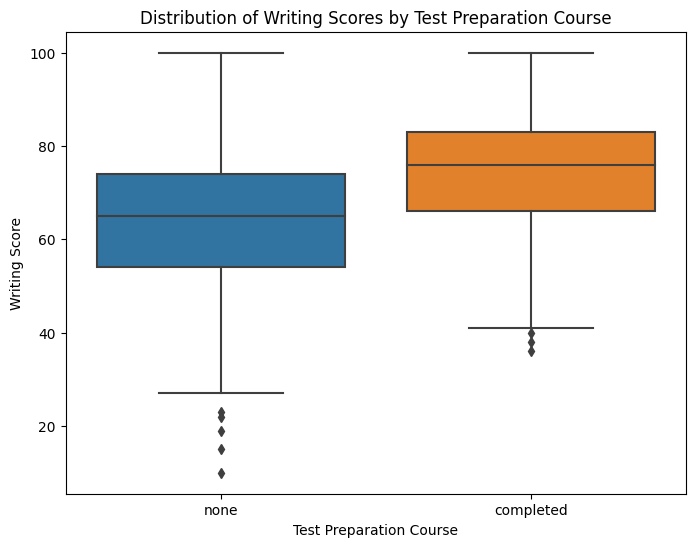

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot of writing scores by test preparation course
plt.figure(figsize=(8, 6))
sns.boxplot(x='test preparation course', y='writing score', data=df)

# Add title and labels
plt.title('Distribution of Writing Scores by Test Preparation Course')
plt.xlabel('Test Preparation Course')
plt.ylabel('Writing Score')

# Display the plot
plt.show()

In [19]:
from scipy.stats import ttest_ind

completed_prep_writing_scores = df[df['test preparation course'] == 'completed']['writing score']
not_completed_prep_writing_scores = df[df['test preparation course'] == 'none']['writing score']

# Perform a two-sample independent t-test assuming unequal variances
t_statistic, p_value = ttest_ind(completed_prep_writing_scores, not_completed_prep_writing_scores, equal_var=False)

print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
result = ("Reject H₀: Significant difference in writing scores" 
          if p_value < alpha 
          else "Fail to reject H₀: No significant difference in writing scores")
print(result)

T-statistic: 10.7525
P-value: 0.0000
Reject H₀: Significant difference in writing scores


# Interpretation of Two-Sample T-Test for Test Prep Effect on Writing Scores

The test compares the average writing scores between students who completed the test preparation course and those who did not.

Null hypothesis (H₀): There is no significant difference in mean writing scores between the two groups.

Alternative hypothesis (H₁): There is a significant difference in mean writing scores between the two groups.

T-statistic = 10.7525

P-value = 0.0000 (< 0.05)

Since the p-value is less than 0.05, we reject the null hypothesis.

This means there is a statistically significant difference in writing scores between students who completed the test preparation course and those who did not.

The positive t-statistic indicates that students who completed the course achieved higher average writing scores.

This suggests that the test preparation course had a beneficial impact on students’ writing performance.

# Final Interpritation

The two-sample independent t-test was conducted to determine whether completing a test preparation course had an effect on students’ writing scores.
The results showed a t-statistic of 10.7525 and a p-value of 0.0000, which is far below the 0.05 significance level.

Therefore, the null hypothesis (H₀) is rejected, indicating a statistically significant difference in writing scores between students who completed the test preparation course and those who did not.

The positive t-statistic confirms that students who completed the test preparation course achieved higher average writing scores.

This finding suggests that the test preparation course had a strong positive impact on writing performance, likely due to improved exam readiness, structured learning, and better practice opportunities provided by the course.